Directly download the dataset from kaggle using api

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"b131832","key":"98ff46acbf5d512786f52e764dd1bc63"}'}

In [ ]:
! pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Whatever dataset u want to requires just copy api of particular dataset

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 99% 445M/450M [00:04<00:00, 101MB/s] 
100% 450M/450M [00:04<00:00, 98.4MB/s]


In [ ]:
!ls -lrth

total 450M
drwxr-xr-x 1 root root 4.0K Oct 28 16:30 sample_data
-rw-r--r-- 1 root root   63 Nov  8 14:45 kaggle.json
-rw-r--r-- 1 root root 450M Nov  8 14:48 flowers-recognition.zip


!unzipping the flower dataset

In [ ]:
!unzip flowers-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: flowers/flowers/rose/11102341464_508d558dfc_n.jpg  
  inflating: flowers/flowers/rose/11233672494_d8bf0a3dbf_n.jpg  
  inflating: flowers/flowers/rose/11694025703_9a906fedc1_n.jpg  
  inflating: flowers/flowers/rose/118974357_0faa23cce9_n.jpg  
  inflating: flowers/flowers/rose/11944957684_2cc806276e.jpg  
  inflating: flowers/flowers/rose/12165480946_c4a3fe182d_n.jpg  
  inflating: flowers/flowers/rose/12202373204_34fb07205b.jpg  
  inflating: flowers/flowers/rose/12238827553_cf427bfd51_n.jpg  
  inflating: flowers/flowers/rose/12240165555_98625b1e88_n.jpg  
  inflating: flowers/flowers/rose/12240303_80d87f77a3_n.jpg  
  inflating: flowers/flowers/rose/12240577184_b0de0e53ea_n.jpg  
  inflating: flowers/flowers/rose/12243068283_ee4c2683e2_n.jpg  
  inflating: flowers/flowers/rose/12243069253_e512464095_n.jpg  
  inflating: flowers/flowers/rose/123128873_546b8b7355_n.jpg  
  inflating: flowers/flowers/rose/12323085443_8ac0

In [ ]:
!ls -lrth flowers/
#!mv flowers/flowers/ content/
#!ls -lrth content/flowers

total 252K
drwxr-xr-x 2 root root  48K Nov  8 14:51 daisy
drwxr-xr-x 2 root root  64K Nov  8 14:51 dandelion
drwxr-xr-x 7 root root 4.0K Nov  8 14:51 flowers
drwxr-xr-x 2 root root  40K Nov  8 14:51 rose
drwxr-xr-x 2 root root  40K Nov  8 14:51 sunflower
drwxr-xr-x 2 root root  56K Nov  8 14:51 tulip
ls: cannot access 'content/flowers': No such file or directory


The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm.notebook import tqdm
import os
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

# from 



Declaring local varibles to be used in this process

In [ ]:
imgs_path='flowers/'
img_size=224
batch_size=32


**Data preprocessing**

In [ ]:
labels = ['dandelion', 'daisy','tulip','sunflower','rose']

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
data = get_data(imgs_path)

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


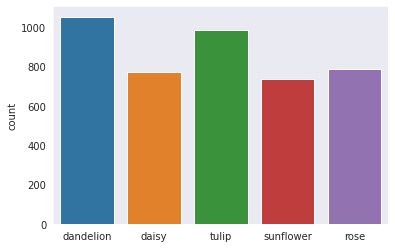

In [ ]:
l = []
for i in data:
    l.append(labels[i[1]])
sns.set_style('dark')
sns.countplot(l)

The dataset seems balanced as for each training label , enough training examples exist



Randomly Previewing first 10 images



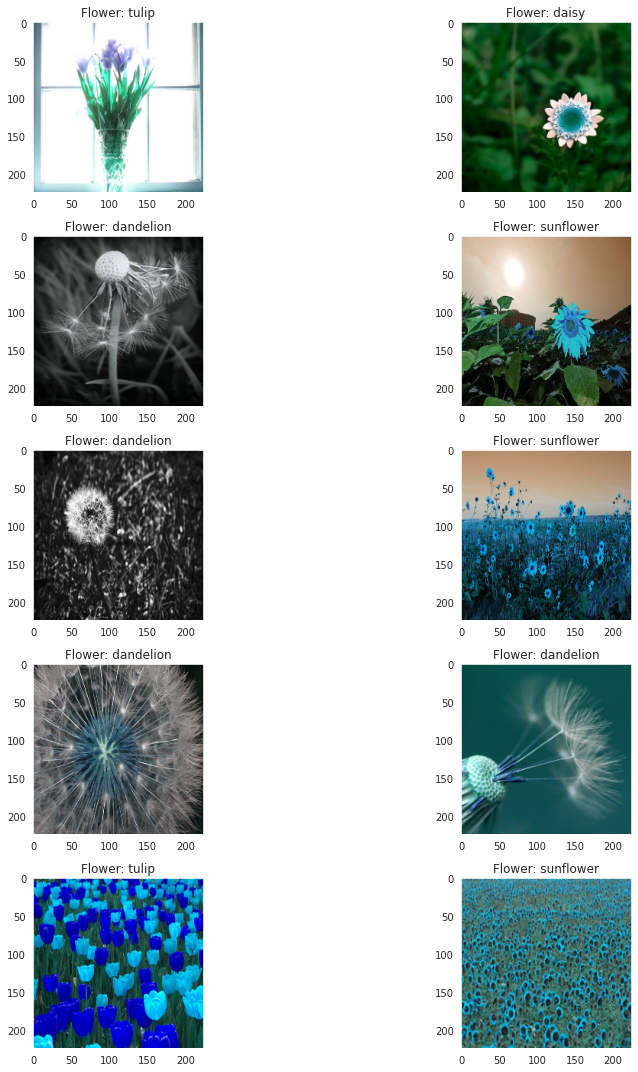

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('Flower: '+labels[data[l][1]])
        
plt.tight_layout()

In [ ]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [ ]:
# Normalize the data
x = np.array(x) / 255

In [ ]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's 
x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
del x,y,data#----->must run command otherwise 

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import Model
from tensorflow.keras.layers import MaxPool2D,Dense,Flatten,Dropout
from tensorflow import keras
from tensorflow.keras.models import Sequential


pre_trained_model = VGG19(input_shape=(224,224,3), include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:19]:
        layer.trainable = False

model=Sequential()
model.add(pre_trained_model)
model.add(MaxPool2D((2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
'''model = Sequential([
        pre_trained_model,
        MaxPool2D((2,2) , strides = 2),
        Flatten(),
        Dense(5 , activation='softmax')])'''

model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



80142336/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 23045     
Total params: 20,047,429
Trainable params: 4,742,661
Non-trainable params: 15,304,768
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
learning_rate=ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.0001)
cb_early_stop=EarlyStopping(monitor = 'val_loss', patience = 3)
callbacks_list=[learning_rate,cb_early_stop]

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64,callbacks=[callbacks_list])

Epoch 1/10
55/55 [==============================] - 21s 383ms/step - loss: 0.8457 - accuracy: 0.6836 - val_loss: 0.5535 - val_accuracy: 0.7884
Epoch 2/10
55/55 [==============================] - 19s 340ms/step - loss: 0.3956 - accuracy: 0.8560 - val_loss: 0.4836 - val_accuracy: 0.8231
Epoch 3/10
55/55 [==============================] - 19s 344ms/step - loss: 0.2304 - accuracy: 0.9130 - val_loss: 0.4336 - val_accuracy: 0.8509
Epoch 4/10
55/55 [==============================] - 19s 350ms/step - loss: 0.1450 - accuracy: 0.9488 - val_loss: 0.7383 - val_accuracy: 0.7792
Epoch 5/10
55/55 [==============================] - 19s 353ms/step - loss: 0.1504 - accuracy: 0.9482 - val_loss: 0.7123 - val_accuracy: 0.8058
Epoch 6/10
54/55 [============================>.] - ETA: 0s - loss: 0.0548 - accuracy: 0.9847
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
55/55 [==============================] - 20s 355ms/step - loss: 0.0549 - accuracy: 0.9847 - val_loss: 0.6101 - 

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

28/28 [==============================] - 4s 140ms/step - loss: 0.6101 - accuracy: 0.8497
Loss of the model is -  0.6100877523422241
28/28 [==============================] - 4s 130ms/step - loss: 0.6101 - accuracy: 0.8497
Accuracy of the model is -  84.9711000919342 %


In [ ]:
predictions = model.predict_classes(x_test)
predictions[:5]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 2, 3, 4, 3])

In [ ]:
prob=model.predict_proba(x_test)
prob[0:5]

Instructions for updating:
Please use `model.predict()` instead.


array([[9.9990702e-01, 6.3614047e-05, 1.1145138e-05, 1.8124745e-05,
        2.7870404e-09],
       [1.3200393e-01, 5.3310841e-02, 7.9151529e-01, 1.7711500e-02,
        5.4585203e-03],
       [4.0261246e-02, 7.0585757e-02, 2.0739043e-01, 6.8172336e-01,
        3.9197126e-05],
       [4.4740918e-06, 6.2074714e-09, 4.2253302e-04, 6.2870800e-05,
        9.9951017e-01],
       [3.4664305e-16, 1.2599067e-14, 1.9812500e-21, 1.0000000e+00,
        5.1993366e-26]], dtype=float32)

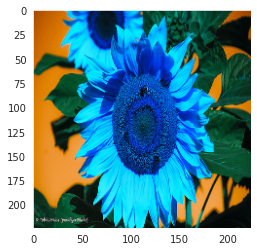

In [ ]:
plt.imshow(x_test[4])

In [ ]:
y_test[0:5]

array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [ ]:
y_test_inv = label_binarizer.inverse_transform(y_test)
y_test_inv[0:5]

array([0, 2, 1, 4, 3])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_inv, predictions, target_names = labels))

              precision    recall  f1-score   support

   dandelion       0.90      0.89      0.89       210
       daisy       0.91      0.82      0.87       154
       tulip       0.71      0.91      0.80       197
   sunflower       0.91      0.88      0.89       147
        rose       0.90      0.72      0.80       157

    accuracy                           0.85       865
   macro avg       0.87      0.84      0.85       865
weighted avg       0.86      0.85      0.85       865



In [ ]:
cm = confusion_matrix(y_test_inv,predictions)
cm

array([[186,   5,  14,   4,   1],
       [ 12, 127,  11,   4,   0],
       [  3,   3, 180,   2,   9],
       [  5,   2,   8, 129,   3],
       [  0,   2,  39,   3, 113]])

In [ ]:
cm = pd.DataFrame(cm , index = labels , columns = labels)

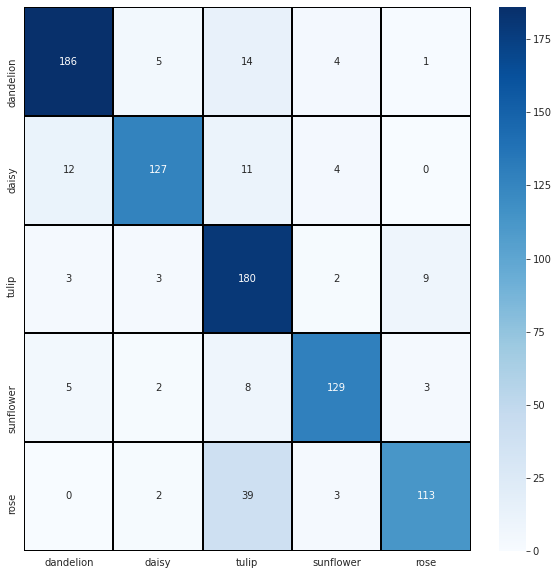

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = labels , yticklabels = labels)

In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test_inv)):
    if(y_test_inv[i] == predictions[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test_inv)):
    if(y_test_inv[i] != predictions[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

correctly classified images

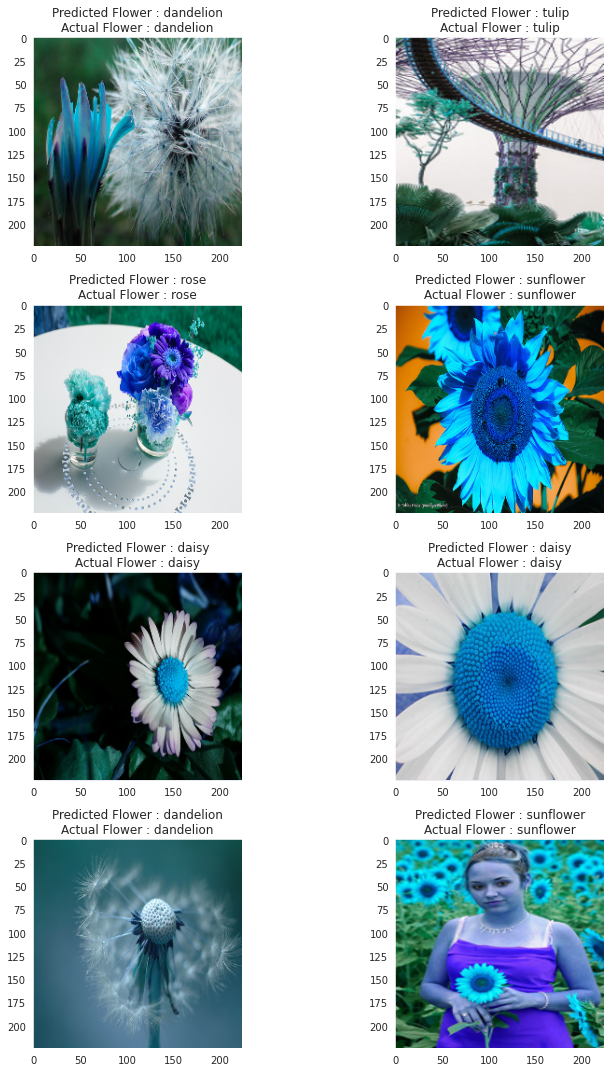

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+ labels[predictions[prop_class[count]]] +"\n"+"Actual Flower : "+ labels[y_test_inv[prop_class[count]]])
        plt.tight_layout()
        count+=1

mis-classified images

In [ ]:
labels

['dandelion', 'daisy', 'tulip', 'sunflower', 'rose']

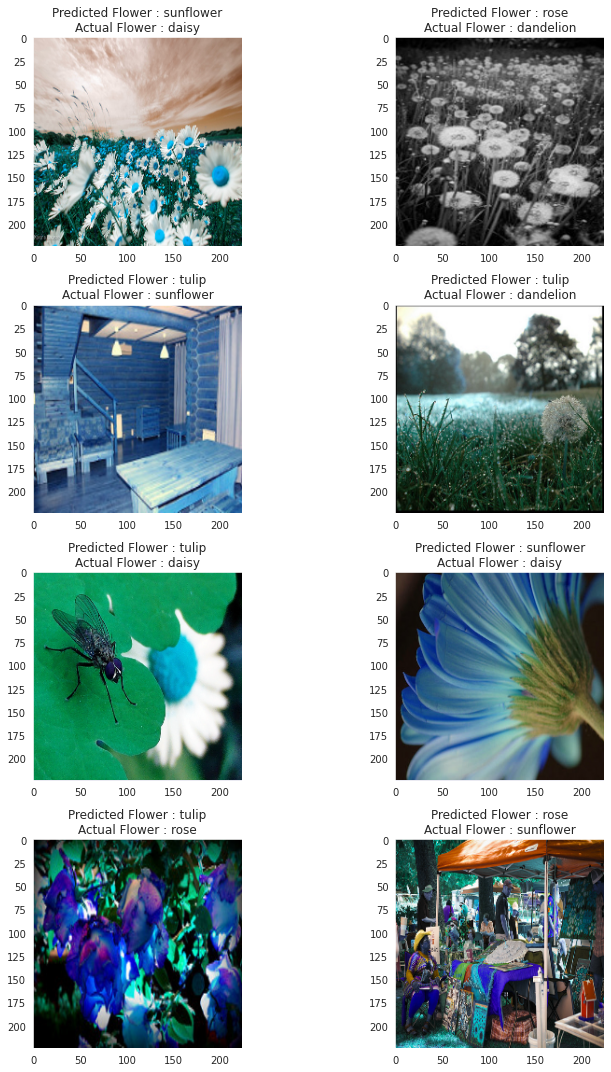

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+labels[predictions[mis_class[count]]]+"\n"+"Actual Flower : "+labels[y_test_inv[mis_class[count]]])
        plt.tight_layout()
        count+=1

In [ ]:
model.save_weights('/content/flower_vgg19.h5')

Text(0.5, 1.0, 'val accuracy')

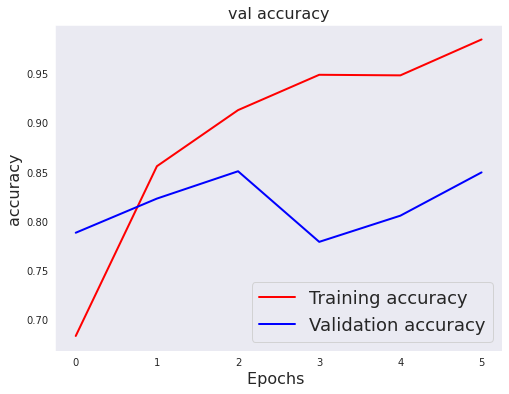

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

Now testing on external images

In [ ]:
from google.colab import files
files.upload()

Saving 12240303_80d87f77a3_n.jpg to 12240303_80d87f77a3_n.jpg


{'12240303_80d87f77a3_n.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00\x0cAppleMark\n\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x00\xf0\x01@\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x05\x06\x04\x07\x08\x03\x02\x01\x00\t\xff\xc4\x00F\x10\x00\x01\x03\x03\x02\x03\x06\x03\x06\x04\x05\x02\x04\x06\x03\x00\x01\x02\x03\x04\x00\x05\x11\x06!\x121A\x07\x13"Qaq\x08\x81\x91\x142B

(1, 224, 224, 3)

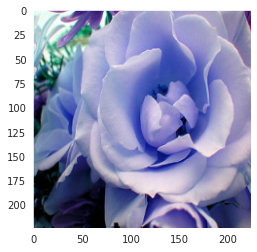

In [ ]:
image_name='12240303_80d87f77a3_n.jpg'   # enter image to test
x1=[]
img_1 = cv2.imread(image_name, cv2.IMREAD_COLOR)  # 
resized_arr_1 = cv2.resize(img_1, (img_size, img_size)) # Reshaping images to preferred size
plt.imshow(resized_arr_1)
x1.append([resized_arr_1])
x1=np.array(x1)
# plt.imshow(x)
# Normalize the data
x1 = np.array(x1) / 255
x1 = x1.reshape(-1, img_size, img_size, 3)
x1.shape

**getting predictions**

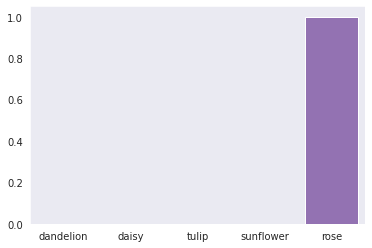

In [ ]:
pred=model.predict_classes(x1) # for predicting class
# print(pred)
prob=model.predict_proba(x1)  # predicting probability
# labels_pred=np.argmax(pred,axis=0)
# labels=get_labels(labels_pred)
flowers = ["dandelion","daisy","tulip","sunflower","rose"]
pred_results=pd.DataFrame(data=prob,columns=flowers)
# print(pred_results.head())
import seaborn as sns
# sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
plt.show()
# pred_results.head()